# Movies Data Analysis

### 1- Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
# %matplotlib qt
%matplotlib inline

### Data Wrangling

In [2]:
df = pd.read_csv('TmDBMovies.csv')
pd.set_option('display.max_columns', None)
df.sample(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6693,13722,tt0427528,0.593560,15000000,0,Mercenary for Justice,Steven Seagal|Jacqueline Lord|Roger Guenveur S...,NaN,Don E. FauntLeRoy,NaN,NaN,Mercenary John Seeger is one of the best in th...,91,Action|Thriller,NaN,4/25/06,12,4.5,2006,1.622504e+07,0.000000e+00
10014,1551,tt0099582,0.513080,26000000,61489265,Flatliners,Kiefer Sutherland|Julia Roberts|Kevin Bacon|Wi...,NaN,Joel Schumacher,Some lines shouldn't be crossed.,life and death|afterlife|swing|memory|medical ...,Five medical students want to find out if ther...,115,Drama|Horror|Science Fiction|Thriller,Columbia Pictures Corporation|Stonebridge Ente...,8/9/90,179,6.0,1990,4.339136e+07,1.026193e+08
355,310137,tt1230213,0.330484,0,0,Reversal,Tina Ivlev|Richard Tyson|Bianca Malinowski|Kri...,NaN,JosÃ© Manuel Cravioto,Escape is just the beginning.,van|revenge|murder|kidnapping|gore,"A young woman, Eve, fights back and manages to...",80,Thriller|Horror,Dark Factory Entertainment,6/26/15,54,5.4,2015,0.000000e+00,0.000000e+00
5407,14908,tt0119640,0.148761,0,4529843,McHale's Navy,Tom Arnold|Dean Stockwell|Debra Messing|David ...,NaN,Bryan Spicer,He's Under Siege and Out-of-Control.,terror|exotic island|terrorist|us navy|base,Retired Lieutenant Commander Quinton McHale sp...,108,Action|Comedy|Romance,Universal Pictures|The Bubble Factory|Sheinber...,4/18/97,14,4.7,1997,0.000000e+00,6.153612e+06
7867,42172,tt0079271,0.167108,0,0,Hardcore,George C. Scott|Peter Boyle|Season Hubley|Dick...,NaN,Paul Schrader,"Oh my God, that's my daughter.",pornography|runaway|snuff|daughter|father,A conservative Midwest businessman ventures in...,109,Crime|Drama|Thriller,Columbia Pictures Corporation|A-Team,2/9/79,16,6.1,1979,0.000000e+00,0.000000e+00
2901,9029,tt1033643,1.682909,35000000,170000000,What Happens in Vegas,Ashton Kutcher|Cameron Diaz|Lake Bell|Queen La...,NaN,Tom Vaughan,Get Lucky,casino|hotel|roommate|fictitious marriage|roma...,"During a wild vacation in Las Vegas, career wo...",99,Comedy|Romance,Twentieth Century Fox Film Corporation|Regency...,5/7/08,573,5.8,2008,3.544753e+07,1.721737e+08
4528,82631,tt1870529,0.582429,0,5310554,Won't Back Down,Viola Davis|Maggie Gyllenhaal|Ving Rhames|Lanc...,NaN,Daniel Barnz,If you can't beat the system... change it,based on true story,"Two determined mothersÂ­, one a teacher, look ...",121,Drama,20th Century Fox|Gran Via Productions|Walden M...,9/28/12,21,5.2,2012,0.000000e+00,5.043668e+06
5647,149910,tt2999390,0.523153,0,0,Super Buddies,Michael Teigen|Tim Conway|Cooper Roth|Jeremy S...,NaN,Robert Vince,You don't need superpowers to be a super hero.,farm life|talking animal|talking dog|superhero...,When the five puppies stumble upon the Five Po...,81,Family,Key Pix Productions,8/7/13,25,6.3,2013,0.000000e+00,0.000000e+00
270,253331,tt2883434,0.462090,9000000,21571189,Black or White,Kevin Costner|Jennifer Ehle|Gillian Jacobs|Oct...,NaN,Mike Binder,There's more to family than what you see.,grieving widower|widower,A grieving widower is drawn into a custody bat...,121,Drama,Treehouse Pictures,1/30/15,72,6.7,2015,8.279996e+06,1.984549e+07
10711,24134,tt0059084,0.168025,0,0,Darling,Julie Christie|Laurence Harvey|Dirk Bogarde|Jo...,NaN,John Schlesinger,"Shame, shame, everybody knows your name!",italy|journalist|model,A beautiful but amoral model sleeps her way to...,128,Drama|Romance,Vic Films Productions|Joseph Janni Production,8/3/65,16,5.8,1965,0.000000e+00,0.000000e+00


### Cleaning Data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
df.dropna(how='all', inplace=True)

In [5]:
df['id'].nunique()

10865

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date          10

In [10]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Exploratory Data Analysis

In [11]:
df.shape

(10865, 21)

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
df['budget'] = df['budget'].div(1000000).round(2)
df['revenue'] = df['revenue'].div(1000000).round(2)
df['budget_adj'] = df['budget_adj'].div(1000000).round(2)
df['revenue_adj'] = df['revenue_adj'].div(1000000).round(2)
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [14]:
corr_matrix = df[['popularity', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'profit']].corr()
corr_matrix

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
popularity,1.000000,0.800828,0.209517,0.089806,0.513556,0.609085,0.562838
vote_count,0.800828,1.000000,0.253818,0.107962,0.587062,0.707941,0.656885
vote_average,0.209517,0.253818,1.000000,-0.117576,0.093079,0.193063,0.197501
release_year,0.089806,0.107962,-0.117576,1.000000,0.016770,-0.066236,-0.081103
budget_adj,0.513556,0.587062,0.093079,0.016770,1.000000,0.646628,0.472927
revenue_adj,0.609085,0.707941,0.193063,-0.066236,0.646628,1.000000,0.977917
profit,0.562838,0.656885,0.197501,-0.081103,0.472927,0.977917,1.000000


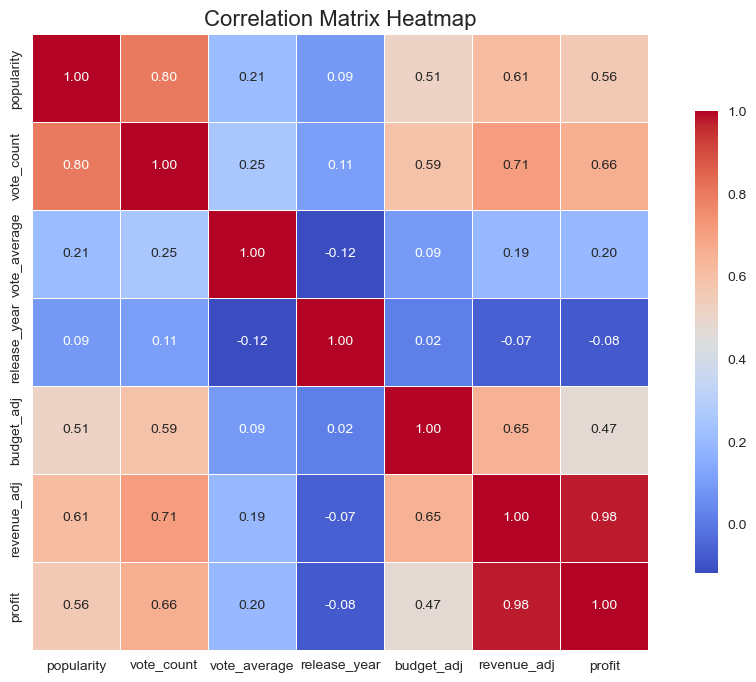

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

In [16]:
def split_list(data, col):
#     data[col] = data[col].fillna('')
    data[col] = data[col].apply(lambda fn: fn.split('|'))
    data_split = data.explode(col)
    return data_split

In [17]:
df['cast']

0        Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1        Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2        Shailene Woodley|Theo James|Kate Winslet|Ansel...
3        Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4        Vin Diesel|Paul Walker|Jason Statham|Michelle ...
                               ...                        
10861    Michael Hynson|Robert August|Lord 'Tally Ho' B...
10862    James Garner|Eva Marie Saint|Yves Montand|Tosh...
10863    Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...
10864    Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...
10865    Harold P. Warren|Tom Neyman|John Reynolds|Dian...
Name: cast, Length: 10865, dtype: object

In [18]:
def remove_special_chars(text):
    return re.sub(r'[^A-Za-z\s\,\[\]\'\,\|]', '', text)

df['cast'] = df['cast'].fillna('Unavailable Cast')
# df['cast'] = df['cast'].apply(remove_special_chars)

df_actor = split_list(df, 'cast')
df_actor['cast'].head(5)

0            Chris Pratt
0    Bryce Dallas Howard
0            Irrfan Khan
0      Vincent D'Onofrio
0          Nick Robinson
Name: cast, dtype: object

In [19]:
def remove_special_chars(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)
ID = df['imdb_id'].values
Ids = [str(Id) if not pd.isnull(Id) else '' for Id in ID]
df['imdb_id'] = Ids
df['imdb_id'] = df['imdb_id'].replace('', 'Unavailable ID')
df['imdb_id'] = df['imdb_id'].str.lower()
df['imdb_id'] = df['imdb_id'].apply(remove_special_chars)
df['imdb_id']

0        tt0369610
1        tt1392190
2        tt2908446
3        tt2488496
4        tt2820852
           ...    
10861    tt0060371
10862    tt0060472
10863    tt0060161
10864    tt0061177
10865    tt0060666
Name: imdb_id, Length: 10865, dtype: object

In [20]:
web_sites = df['homepage'].values
web_sites = [str(wb_si) if not pd.isnull(wb_si) else '' for wb_si in web_sites]
df['homepage'] = web_sites
df['homepage'] = df['homepage'].replace('', 'Unavailable Home Page')
df['homepage']

0                            http://www.jurassicworld.com/
1                              http://www.madmaxmovie.com/
2           http://www.thedivergentseries.movie/#insurgent
3        http://www.starwars.com/films/star-wars-episod...
4                                 http://www.furious7.com/
                               ...                        
10861                                Unavailable Home Page
10862                                Unavailable Home Page
10863                                Unavailable Home Page
10864                                Unavailable Home Page
10865                                Unavailable Home Page
Name: homepage, Length: 10865, dtype: object

In [21]:
df['genres']

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10865, dtype: object

In [22]:
def remove_special_chars(text):
    return re.sub(r'[^A-Za-z\s\,\[\]\'\,\|]', '', text)

df['genres'] = df['genres'].fillna('Unavailable Genre')
# df['cast'] = df['cast'].apply(remove_special_chars)

df_genre = split_list(df, 'genres')
df_genre['genres'].head(5)

0             Action
0          Adventure
0    Science Fiction
0           Thriller
1             Action
Name: genres, dtype: object

In [23]:
df['director']

0           Colin Trevorrow
1             George Miller
2          Robert Schwentke
3               J.J. Abrams
4                 James Wan
                ...        
10861           Bruce Brown
10862    John Frankenheimer
10863        Eldar Ryazanov
10864           Woody Allen
10865      Harold P. Warren
Name: director, Length: 10865, dtype: object

In [24]:
def remove_special_chars(text):
    return re.sub(r'[^A-Za-z\s\,\[\]\'\,\|]', '', text)

df['director'] = df['director'].str.replace(r'[^A-Za-z\s\,]', '', regex=True)
df['director'] = df['director'].str.replace('\s+', ' ', regex=True)
df['director'] = df['director'].fillna('Unavailable Director')
# df['cast'] = df['cast'].apply(remove_special_chars)

df_director = split_list(df, 'director')
df_director['director'].head(5)

0     Colin Trevorrow
1       George Miller
2    Robert Schwentke
3           JJ Abrams
4           James Wan
Name: director, dtype: object

In [25]:
def remove_special_chars(text):
    return re.sub(r'[^A-Za-z\s\,\[\]\'\,\|]', '', text)

df['production_companies'] = df['production_companies'].fillna('Unavailable Production Company')
df['production_companies'] = df['production_companies'].str.replace(r'[^A-Za-z0-9\s\(\)\+\,\|]', '', regex=True)
df['production_companies'] = df['production_companies'].str.replace('\s+', ' ', regex=True)
# df['cast'] = df['cast'].apply(remove_special_chars)

df_production = split_list(df, 'production_companies')
df_production['production_companies'].head(5)

0          Universal Studios
0       Amblin Entertainment
0         Legendary Pictures
0    Fuji Television Network
0                     Dentsu
Name: production_companies, dtype: object

In [26]:
df['overview'] = df['overview'].fillna('no overview available')

df['overview'] = df['overview'].str.replace(r'[^A-Za-z0-9\s\(\)\,\'\"\-\+\.\;]', ',', regex=True)
df['overview'] = df['overview'].str.replace('\,+', ',', regex=True)
df['overview'] = df['overview'].str.replace('\s+', ' ', regex=True)

df['overview']

0        Twenty-two years after the events of Jurassic ...
1        An apocalyptic story set in the furthest reach...
2        Beatrice Prior must confront her inner demons ...
3        Thirty years after defeating the Galactic Empi...
4        Deckard Shaw seeks revenge against Dominic Tor...
                               ...                        
10861    The Endless Summer, by Bruce Brown, is one of ...
10862    Grand Prix driver Pete Aron is fired by his te...
10863    An insurance agent who moonlights as a carthie...
10864    In comic Woody Allen's film debut, he took the...
10865    A family gets lost on the road and stumbles up...
Name: overview, Length: 10865, dtype: object

In [27]:
 df['keywords']

0        monster|dna|tyrannosaurus rex|velociraptor|island
1         future|chase|post-apocalyptic|dystopia|australia
2        based on novel|revolution|dystopia|sequel|dyst...
3                    android|spaceship|jedi|space opera|3d
4                      car race|speed|revenge|suspense|car
                               ...                        
10861                             surfer|surfboard|surfing
10862                            car race|racing|formula 1
10863                             car|trolley|stealing car
10864                                                spoof
10865                  fire|gun|drive|sacrifice|flashlight
Name: keywords, Length: 10865, dtype: object

In [28]:
keywords_str = df['keywords'].values
keywords_str = [str(keywords) if not pd.isnull(keywords) else '' for keywords in keywords_str]
keywords_list = [keywords.split("|") for keywords in keywords_str]
keywords_list = [','.join(i) for i in keywords_list]
df['keywords'] = keywords_list
df['keywords'] = df['keywords'].replace('', 'no keywords')
df['keywords'] = df['keywords'].str.replace(r'[^A-Za-z0-9\s\,\']', '', regex=True)
df['keywords'] = df['keywords'].str.replace('\s+', ' ', regex=True)
df['keywords'] = df['keywords'].str.lower()
df['keywords']

0        monster,dna,tyrannosaurus rex,velociraptor,island
1          future,chase,postapocalyptic,dystopia,australia
2        based on novel,revolution,dystopia,sequel,dyst...
3                    android,spaceship,jedi,space opera,3d
4                      car race,speed,revenge,suspense,car
                               ...                        
10861                             surfer,surfboard,surfing
10862                            car race,racing,formula 1
10863                             car,trolley,stealing car
10864                                                spoof
10865                  fire,gun,drive,sacrifice,flashlight
Name: keywords, Length: 10865, dtype: object

In [29]:
df['tagline'] = df['tagline'].fillna('no tagline available')
df['tagline'] = df['tagline'].str.replace(r'[^A-Za-z\s\'\,]', ',', regex=True)
df['tagline'] = df['tagline'].str.strip()
df['tagline'] = df['tagline'].str.lower()
df['tagline'] = df['tagline'].str.replace('\s+', ' ', regex=True)
df['tagline'] = df['tagline'].str.replace('\,+', ',', regex=True)
df['tagline']

0                                        the park is open,
1                                       what a lovely day,
2                               one choice can destroy you
3                            every generation has a story,
4                                      vengeance hits home
                               ...                        
10861                                 no tagline available
10862    cinerama sweeps you into a drama of speed and ...
10863                                 no tagline available
10864                            woody allen strikes back,
10865         it's shocking, it's beyond your imagination,
Name: tagline, Length: 10865, dtype: object

In [30]:
def date_correctence(date):
    return pd.to_datetime(date, format='mixed', errors='coerce')

df['release_date'] = df['release_date'].apply(date_correctence)
df['release_date'] = df['release_date'].astype(str).str.replace('2066', '1966')
df['release_date'] = df['release_date'].apply(date_correctence)
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10865 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  float64       
 4   revenue               10865 non-null  float64       
 5   original_title        10865 non-null  object        
 6   cast                  10865 non-null  object        
 7   homepage              10865 non-null  object        
 8   director              10865 non-null  object        
 9   tagline               10865 non-null  object        
 10  keywords              10865 non-null  object        
 11  overview              10865 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres               

In [32]:
df.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
dtype: int64

In [33]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150.00,1513.53,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",http://www.jurassicworld.com/,[Colin Trevorrow],"the park is open,","monster,dna,tyrannosaurus rex,velociraptor,island",Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,138.00,1392.45,1254.45
1,76341,tt1392190,28.419936,150.00,378.44,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",http://www.madmaxmovie.com/,[George Miller],"what a lovely day,","future,chase,postapocalyptic,dystopia,australia",An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,138.00,348.16,210.16
2,262500,tt2908446,13.112507,110.00,295.24,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",http://www.thedivergentseries.movie/#insurgent,[Robert Schwentke],one choice can destroy you,"based on novel,revolution,dystopia,sequel,dyst...",Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,101.20,271.62,170.42
3,140607,tt2488496,11.173104,200.00,2068.18,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",http://www.starwars.com/films/star-wars-episod...,[JJ Abrams],"every generation has a story,","android,spaceship,jedi,space opera,3d",Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,184.00,1902.72,1718.72
4,168259,tt2820852,9.335014,190.00,1506.25,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",http://www.furious7.com/,[James Wan],vengeance hits home,"car race,speed,revenge,suspense,car",Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,174.80,1385.75,1210.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0.00,0.00,The Endless Summer,"[Michael Hynson, Robert August, Lord 'Tally Ho...",Unavailable Home Page,[Bruce Brown],no tagline available,"surfer,surfboard,surfing","The Endless Summer, by Bruce Brown, is one of ...",95,[Documentary],[Bruce Brown Films],1966-06-15,11,7.4,1966,0.00,0.00,0.00
10862,20379,tt0060472,0.065543,0.00,0.00,Grand Prix,"[James Garner, Eva Marie Saint, Yves Montand, ...",Unavailable Home Page,[John Frankenheimer],cinerama sweeps you into a drama of speed and ...,"car race,racing,formula 1",Grand Prix driver Pete Aron is fired by his te...,176,"[Action, Adventure, Drama]","[Cherokee Productions, Joel Productions, Dougl...",1966-12-21,20,5.7,1966,0.00,0.00,0.00
10863,39768,tt0060161,0.065141,0.00,0.00,Beregis Avtomobilya,"[Innokentiy Smoktunovskiy, Oleg Efremov, Georg...",Unavailable Home Page,[Eldar Ryazanov],no tagline available,"car,trolley,stealing car",An insurance agent who moonlights as a carthie...,94,"[Mystery, Comedy]",[Mosfilm],1966-01-01,11,6.5,1966,0.00,0.00,0.00
10864,21449,tt0061177,0.064317,0.00,0.00,"What's Up, Tiger Lily?","[Tatsuya Mihashi, Akiko Wakabayashi, Mie Hama,...",Unavailable Home Page,[Woody Allen],"woody allen strikes back,",spoof,"In comic Woody Allen's film debut, he took the...",80,"[Action, Comedy]",[Benedict Pictures Corp],1966-11-02,22,5.4,1966,0.00,0.00,0.00


In [34]:
df.to_csv('data_c2.csv')

In [35]:
profitbyrelease_year = df.groupby('release_year')['profit'].agg('mean')
profitbyrelease_year

release_year
1960     28.327500
1961     68.614516
1962     36.235312
1963     23.889118
1964     50.466667
1965     76.694571
1966      3.969565
1967    104.128000
1968     30.990513
1969     38.700323
1970     59.348537
1971     32.205273
1972     59.765500
1973    103.472182
1974     69.210426
1975     82.989545
1976     55.343617
1977    127.436316
1978     59.694923
1979     75.376491
1980     47.701538
1981     40.970000
1982     56.369630
1983     48.942375
1984     38.109333
1985     39.558073
1986     37.785950
1987     42.260480
1988     35.786069
1989     52.452263
1990     50.891742
1991     39.008195
1992     54.173684
1993     43.889213
1994     38.905978
1995     51.436400
1996     31.514461
1997     41.773125
1998     31.808667
1999     32.671071
2000     29.152775
2001     39.530455
2002     39.872143
2003     37.536335
2004     36.188241
2005     28.139670
2006     23.779436
2007     28.275023
2008     23.789073
2009     25.908068
2010     25.775010
2011     26.348778

In [36]:
voteaveragebygenres = df_genre.groupby(['genres'])['vote_average'].agg('mean')
voteaveragebygenres

genres
Action               5.787752
Adventure            5.940585
Animation            6.403147
Comedy               5.905167
Crime                6.124889
Documentary          6.908462
Drama                6.165546
Family               5.997563
Fantasy              5.863537
Foreign              5.981383
History              6.410479
Horror               5.337447
Music                6.480392
Mystery              5.946790
Romance              6.042874
Science Fiction      5.665582
TV Movie             5.788024
Thriller             5.750671
Unavailable Genre    6.421739
War                  6.297778
Western              6.083030
Name: vote_average, dtype: float64

In [37]:
groupbydirector = df.groupby(df_director['director'])['profit'].agg('sum')
thetopdirector = groupbydirector.sort_values(ascending=False)
thetopdirector = thetopdirector.head(20)
thetopdirector

director
Steven Spielberg     13050.64
James Cameron         6296.23
George Lucas          5844.15
Peter Jackson         5644.11
Chris Columbus        4353.34
Robert Zemeckis       4326.95
Michael Bay           3958.66
David Yates           3394.44
Tim Burton            3200.47
Christopher Nolan     3149.55
Ron Howard            3051.14
Roland Emmerich       2936.11
JJ Abrams             2689.65
Gore Verbinski        2656.46
Clint Eastwood        2636.19
Guy Hamilton          2608.28
Sam Raimi             2525.86
Ridley Scott          2479.41
Richard Donner        2383.92
Francis Lawrence      2377.72
Name: profit, dtype: float64

In [38]:
groupbydirectorpopularity = df.groupby(df_director['director'])[['original_title' ,'popularity']].agg({'original_title': 'count', 'popularity': 'mean'})
thetopdirectorbypopularity = groupbydirectorpopularity[groupbydirectorpopularity['original_title'] >= 10].sort_values(ascending=False, by='popularity')
thetopdirectorbypopularity = thetopdirectorbypopularity.head(10)
thetopdirectorbypopularity

,original_title,popularity
director,,
Christopher Nolan,10,6.195521
Quentin Tarantino,11,4.187272
Peter Jackson,13,3.774454
David Fincher,10,3.447978
James Cameron,10,2.909811
Chris Columbus,14,2.251037
Michael Bay,11,2.023170
Ridley Scott,23,2.009294
Robert Zemeckis,17,1.977627


array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'release_date'}>],
       [<Axes: title={'center': 'vote_count'}>,
        <Axes: title={'center': 'runtime'}>,
        <Axes: title={'center': 'vote_average'}>],
       [<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'budget_adj'}>,
        <Axes: title={'center': 'revenue_adj'}>],
       [<Axes: title={'center': 'revenue'}>, <Axes: >, <Axes: >]],
      dtype=object)

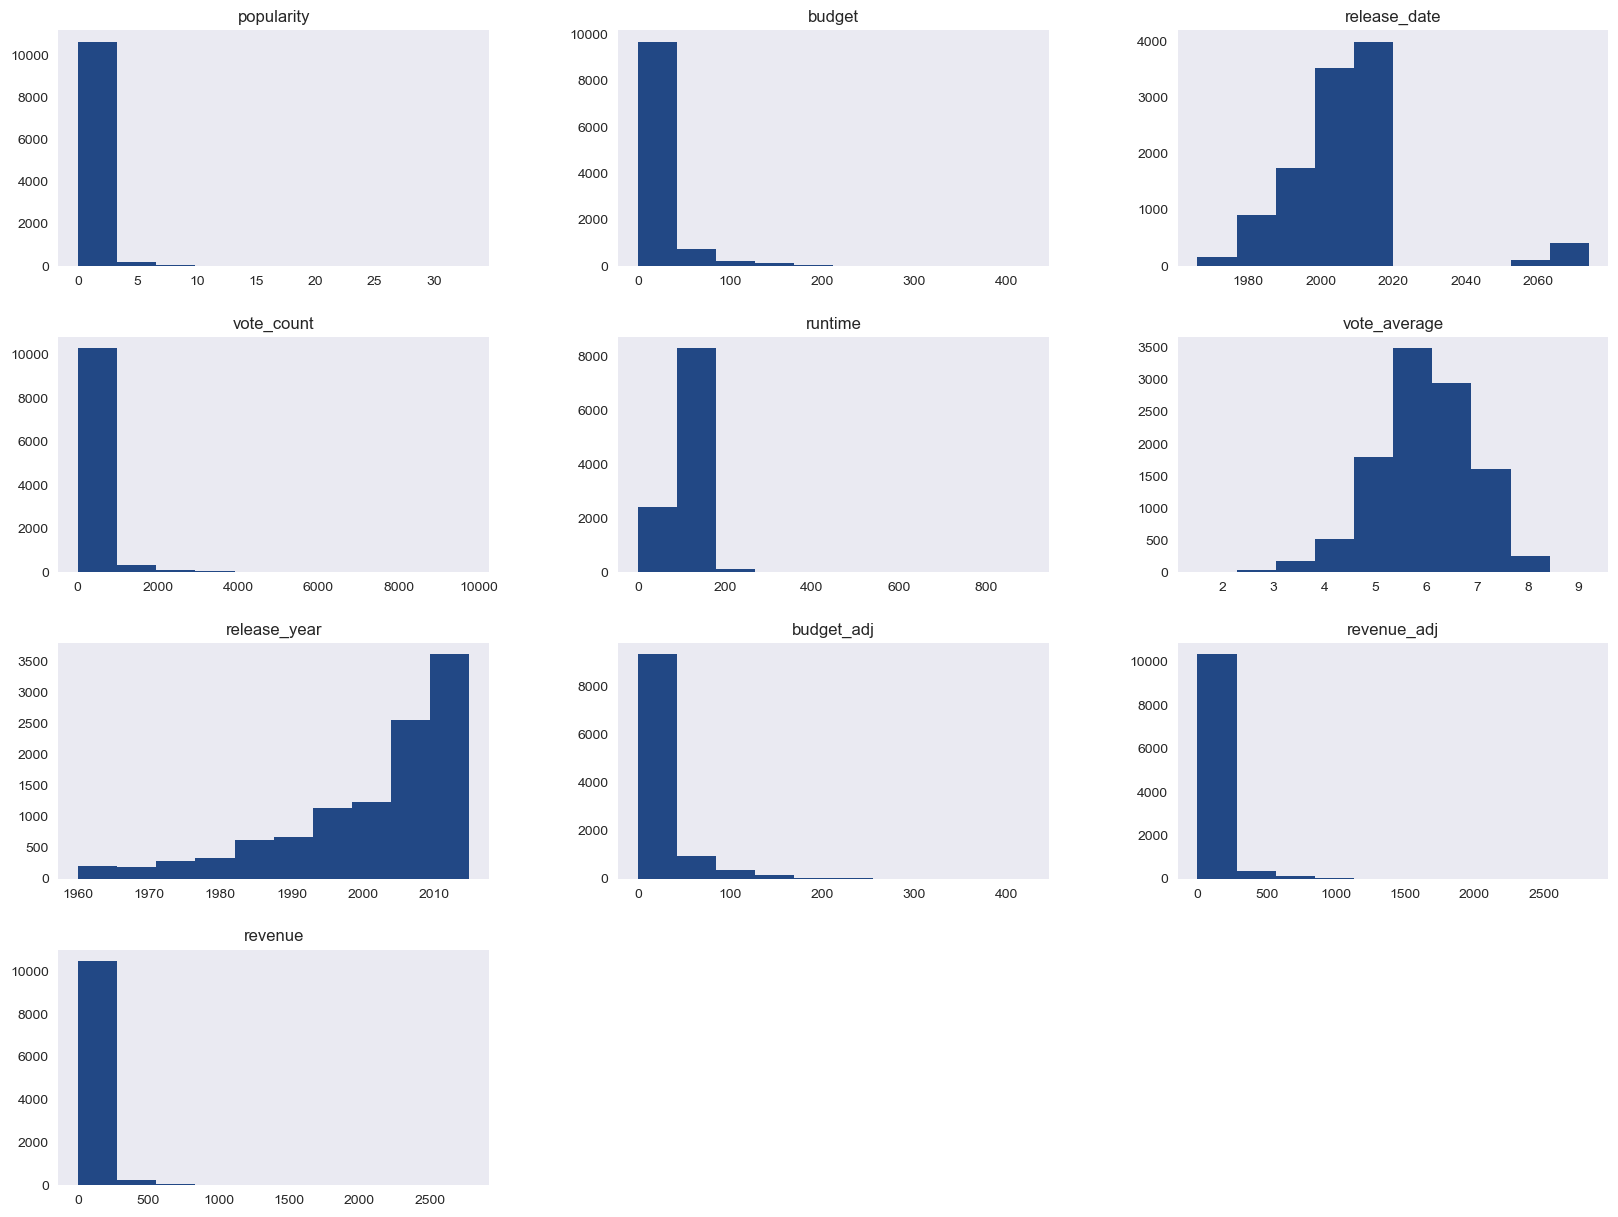

In [39]:
df[['popularity', 
    'budget', 
    'release_date', 
    'vote_count', 
    'runtime', 
    'vote_average', 
    'release_year', 
    'budget_adj', 
    'revenue_adj', 
    'revenue']].hist(figsize=(20, 15), color='#224885', grid=False)

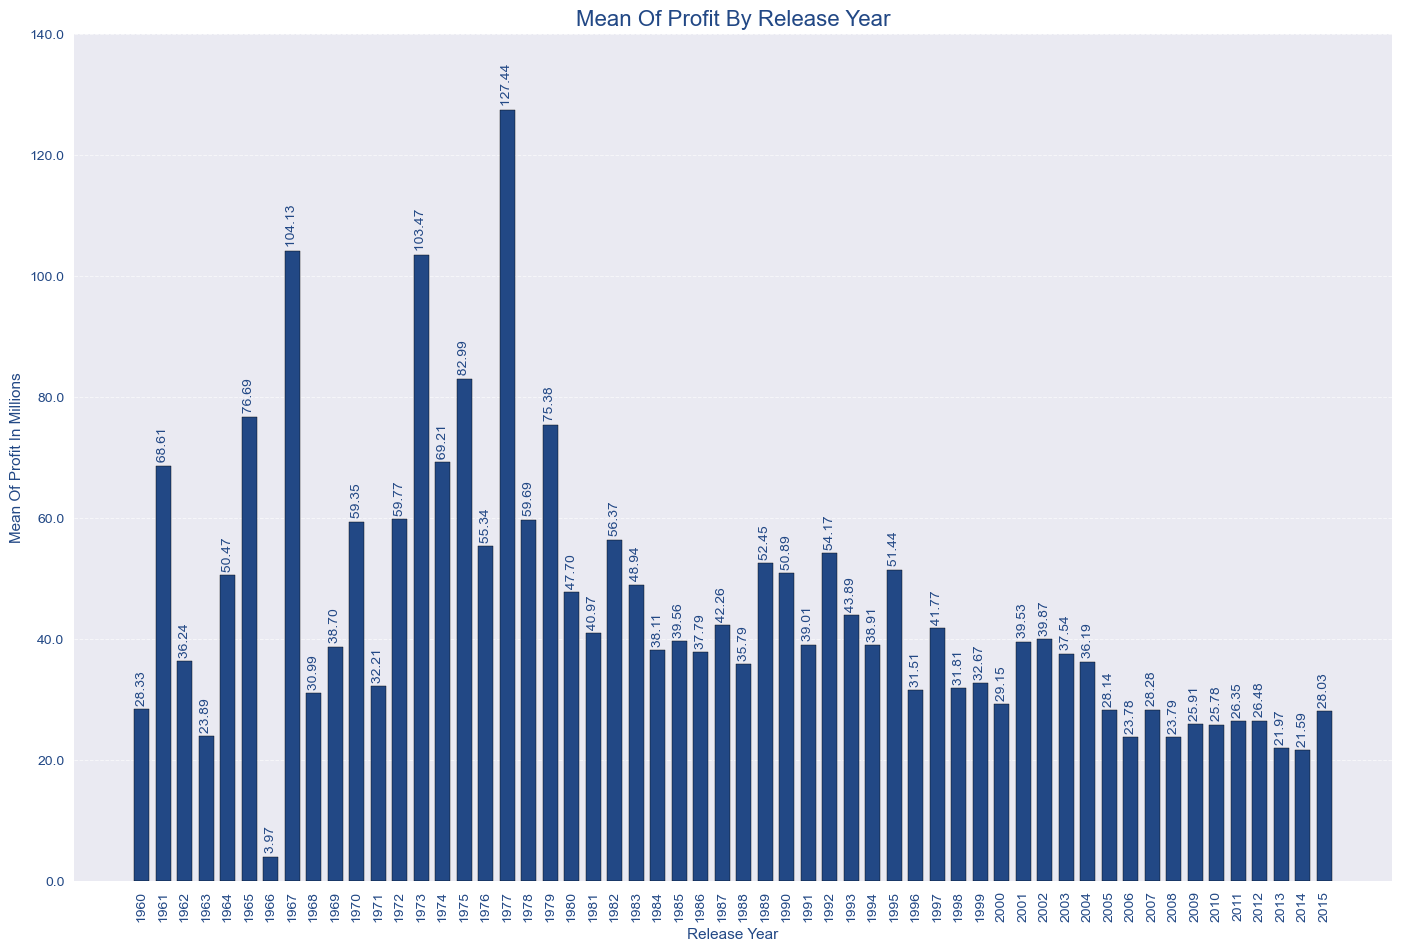

In [40]:
plt.bar(profitbyrelease_year.index, profitbyrelease_year.values, color='#224885', edgecolor='k', width=0.7)
for inx, vl in enumerate(profitbyrelease_year):
    plt.text(profitbyrelease_year.index[inx], vl, f'{vl: .2f}', ha='center', va='bottom', rotation=90, color='#224885')
plt.xticks(profitbyrelease_year.index, rotation=90, ha='center', color='#224885')
ticks = plt.gca().get_yticks()
plt.yticks(ticks, [f'{y}' for y in ticks], color='#224885')
plt.xlabel('Release Year', color='#224885')
plt.ylabel('Mean Of Profit In Millions', color='#224885')
plt.title('Mean Of Profit By Release Year', color='#224885',size=16)
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.gcf().set_size_inches(17, 11)
plt.show()

In [41]:
df['profit']

0        1254.45
1         210.16
2         170.42
3        1718.72
4        1210.95
          ...   
10861       0.00
10862       0.00
10863       0.00
10864       0.00
10865      -0.13
Name: profit, Length: 10865, dtype: float64

C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


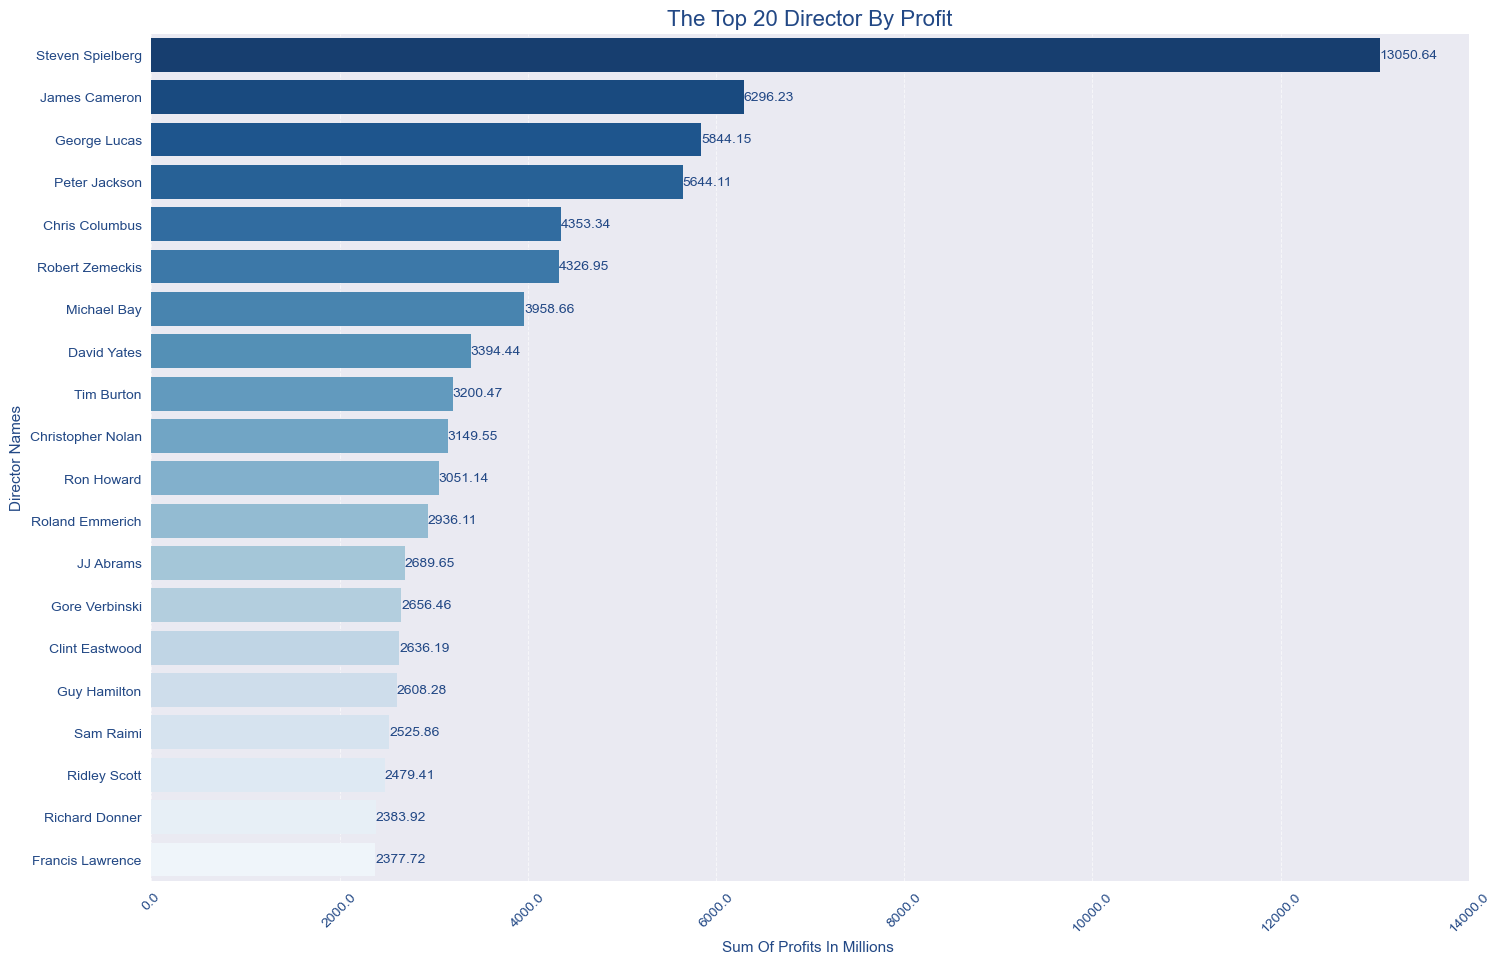

In [42]:
thetopdirector = thetopdirector.sort_values(ascending=False)
# plt.barh(y=thetoptendirector.index, width=thetoptendirector.values, color='#224885')
sns.barplot(y=thetopdirector.index, x=thetopdirector.values, palette='Blues_r')
plt.title('The Top 20 Director By Profit', color='#224885', size=16)
plt.ylabel('Director Names',  color='#224885')
plt.xlabel('Sum Of Profits In Millions ',  color='#224885')
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0)
ticks = plt.gca().get_xticks()
plt.xticks(ticks, [f'{x}' for x in ticks], color='#224885', rotation=45)
plt.yticks(rotation= 0, color='#224885')
for inx, vl in enumerate(thetopdirector):
    plt.text(vl, inx, f'{vl:.2f}', ha='left', va='center', rotation=0, color='#224885')
plt.gcf().set_size_inches(17, 11)

plt.show()

C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


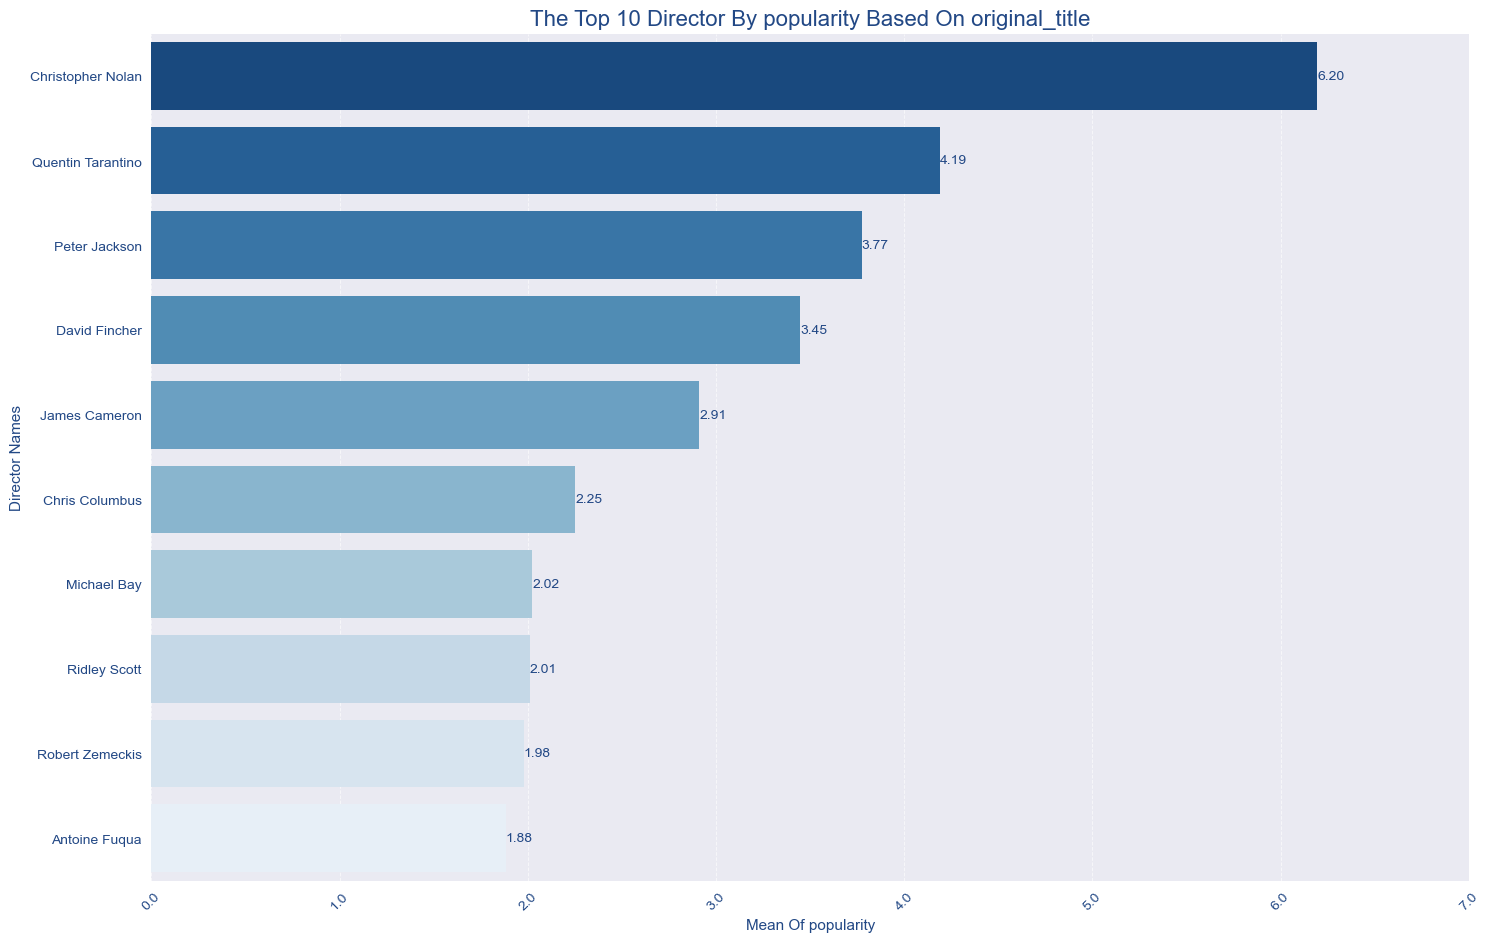

In [43]:
thetopdirectorbypopularity = thetopdirectorbypopularity.sort_values(ascending=False, by='popularity')
# plt.barh(y=thetoptendirector.index, width=thetoptendirector.values, color='#224885')
sns.barplot(y=thetopdirectorbypopularity.index, x=thetopdirectorbypopularity['popularity'].values, palette='Blues_r')
plt.title('The Top 10 Director By popularity Based On original_title', color='#224885', size=16)
plt.ylabel('Director Names',  color='#224885')
plt.xlabel('Mean Of popularity',  color='#224885')
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0)
ticks = plt.gca().get_xticks()
plt.xticks(ticks, [f'{x}' for x in ticks], color='#224885', rotation=45)
plt.yticks(rotation= 0, color='#224885')
for inx, vl in enumerate(thetopdirectorbypopularity['popularity']):
    plt.text(vl, inx, f'{vl:.2f}', ha='left', va='center', rotation=0, color='#224885')
plt.gcf().set_size_inches(17, 11)

plt.show()

In [44]:
profitbygenre = df_genre.groupby('genres')['profit'].agg('mean')
profitbygenre

genres
Action               58.797999
Adventure            97.737723
Animation            59.960987
Comedy               31.976620
Crime                35.102806
Documentary           1.635019
Drama                25.563595
Family               60.812908
Fantasy              73.804891
Foreign              -0.594734
History              21.390629
Horror               16.317715
Music                33.667230
Mystery              31.406914
Romance              32.540958
Science Fiction      57.454036
TV Movie              0.053593
Thriller             34.603037
Unavailable Genre    -0.001304
War                  41.056148
Western              21.603455
Name: profit, dtype: float64

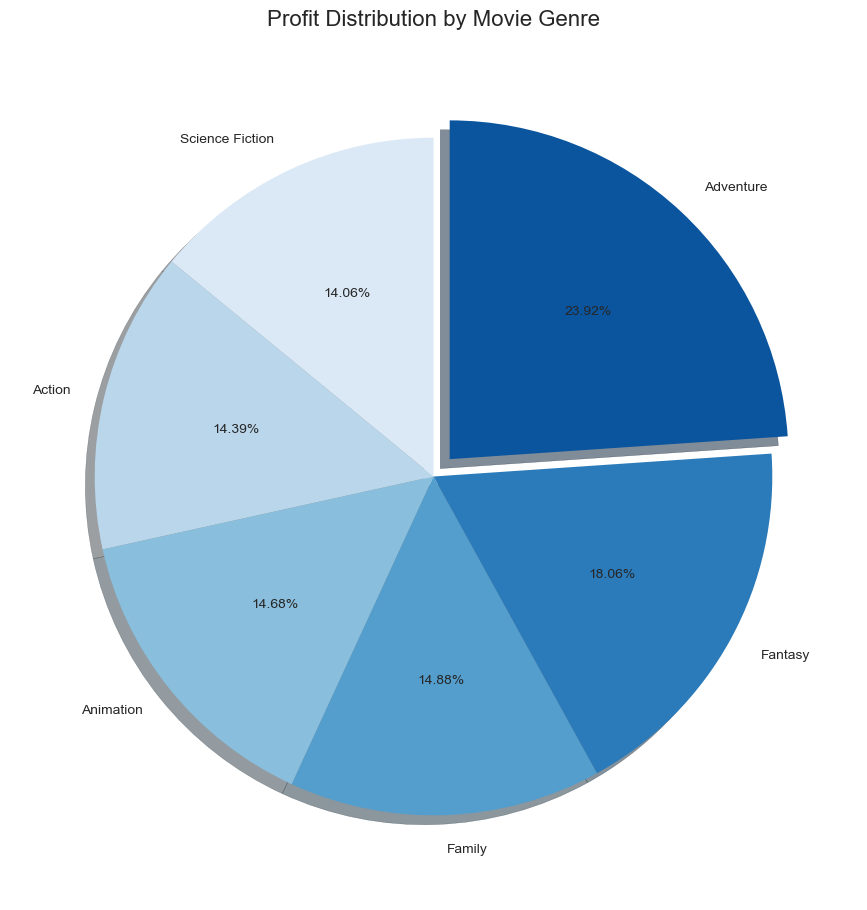

In [45]:
positiveprofitbygenre = profitbygenre[profitbygenre.values > 50].sort_values()
plt.figure(figsize=(10, 7))
explode = [0.07 if genre == 'Adventure' else 0 for genre in positiveprofitbygenre.index]
palette = sns.color_palette("Blues", len(positiveprofitbygenre))
plt.pie(x=positiveprofitbygenre.values, labels=positiveprofitbygenre.index, 
        colors=palette, autopct='%1.2f%%', startangle=90, shadow=True, labeldistance=1.1, explode= explode)

plt.title("Profit Distribution by Movie Genre", fontsize=16, pad=20)
plt.gcf().set_size_inches(17, 11)
plt.show()

In [46]:
moviesovertime = df.groupby('release_year').agg({'original_title': 'count'})
moviesovertime

,original_title
release_year,
1960,32
1961,31
1962,32
1963,34
1964,42
1965,35
1966,46
1967,40
1968,39


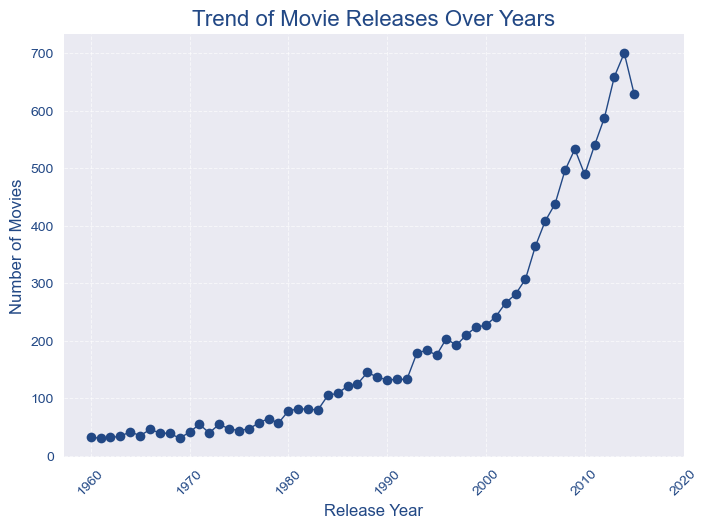

In [47]:
plt.plot(moviesovertime.index, moviesovertime['original_title'], color='#224885', marker='o', linestyle='-', linewidth=1)
plt.title('Trend of Movie Releases Over Years', fontsize=16, color='#224885')
plt.xlabel('Release Year', fontsize=12, color='#224885')
plt.ylabel('Number of Movies', fontsize=12, color='#224885')
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
xticks = list(range(moviesovertime.index.min(), moviesovertime.index.max() + 10, 10))
plt.xticks(xticks, labels=[str(year) for year in xticks], rotation=45, color='#224885')
plt.yticks(color='#224885')
plt.show()

C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

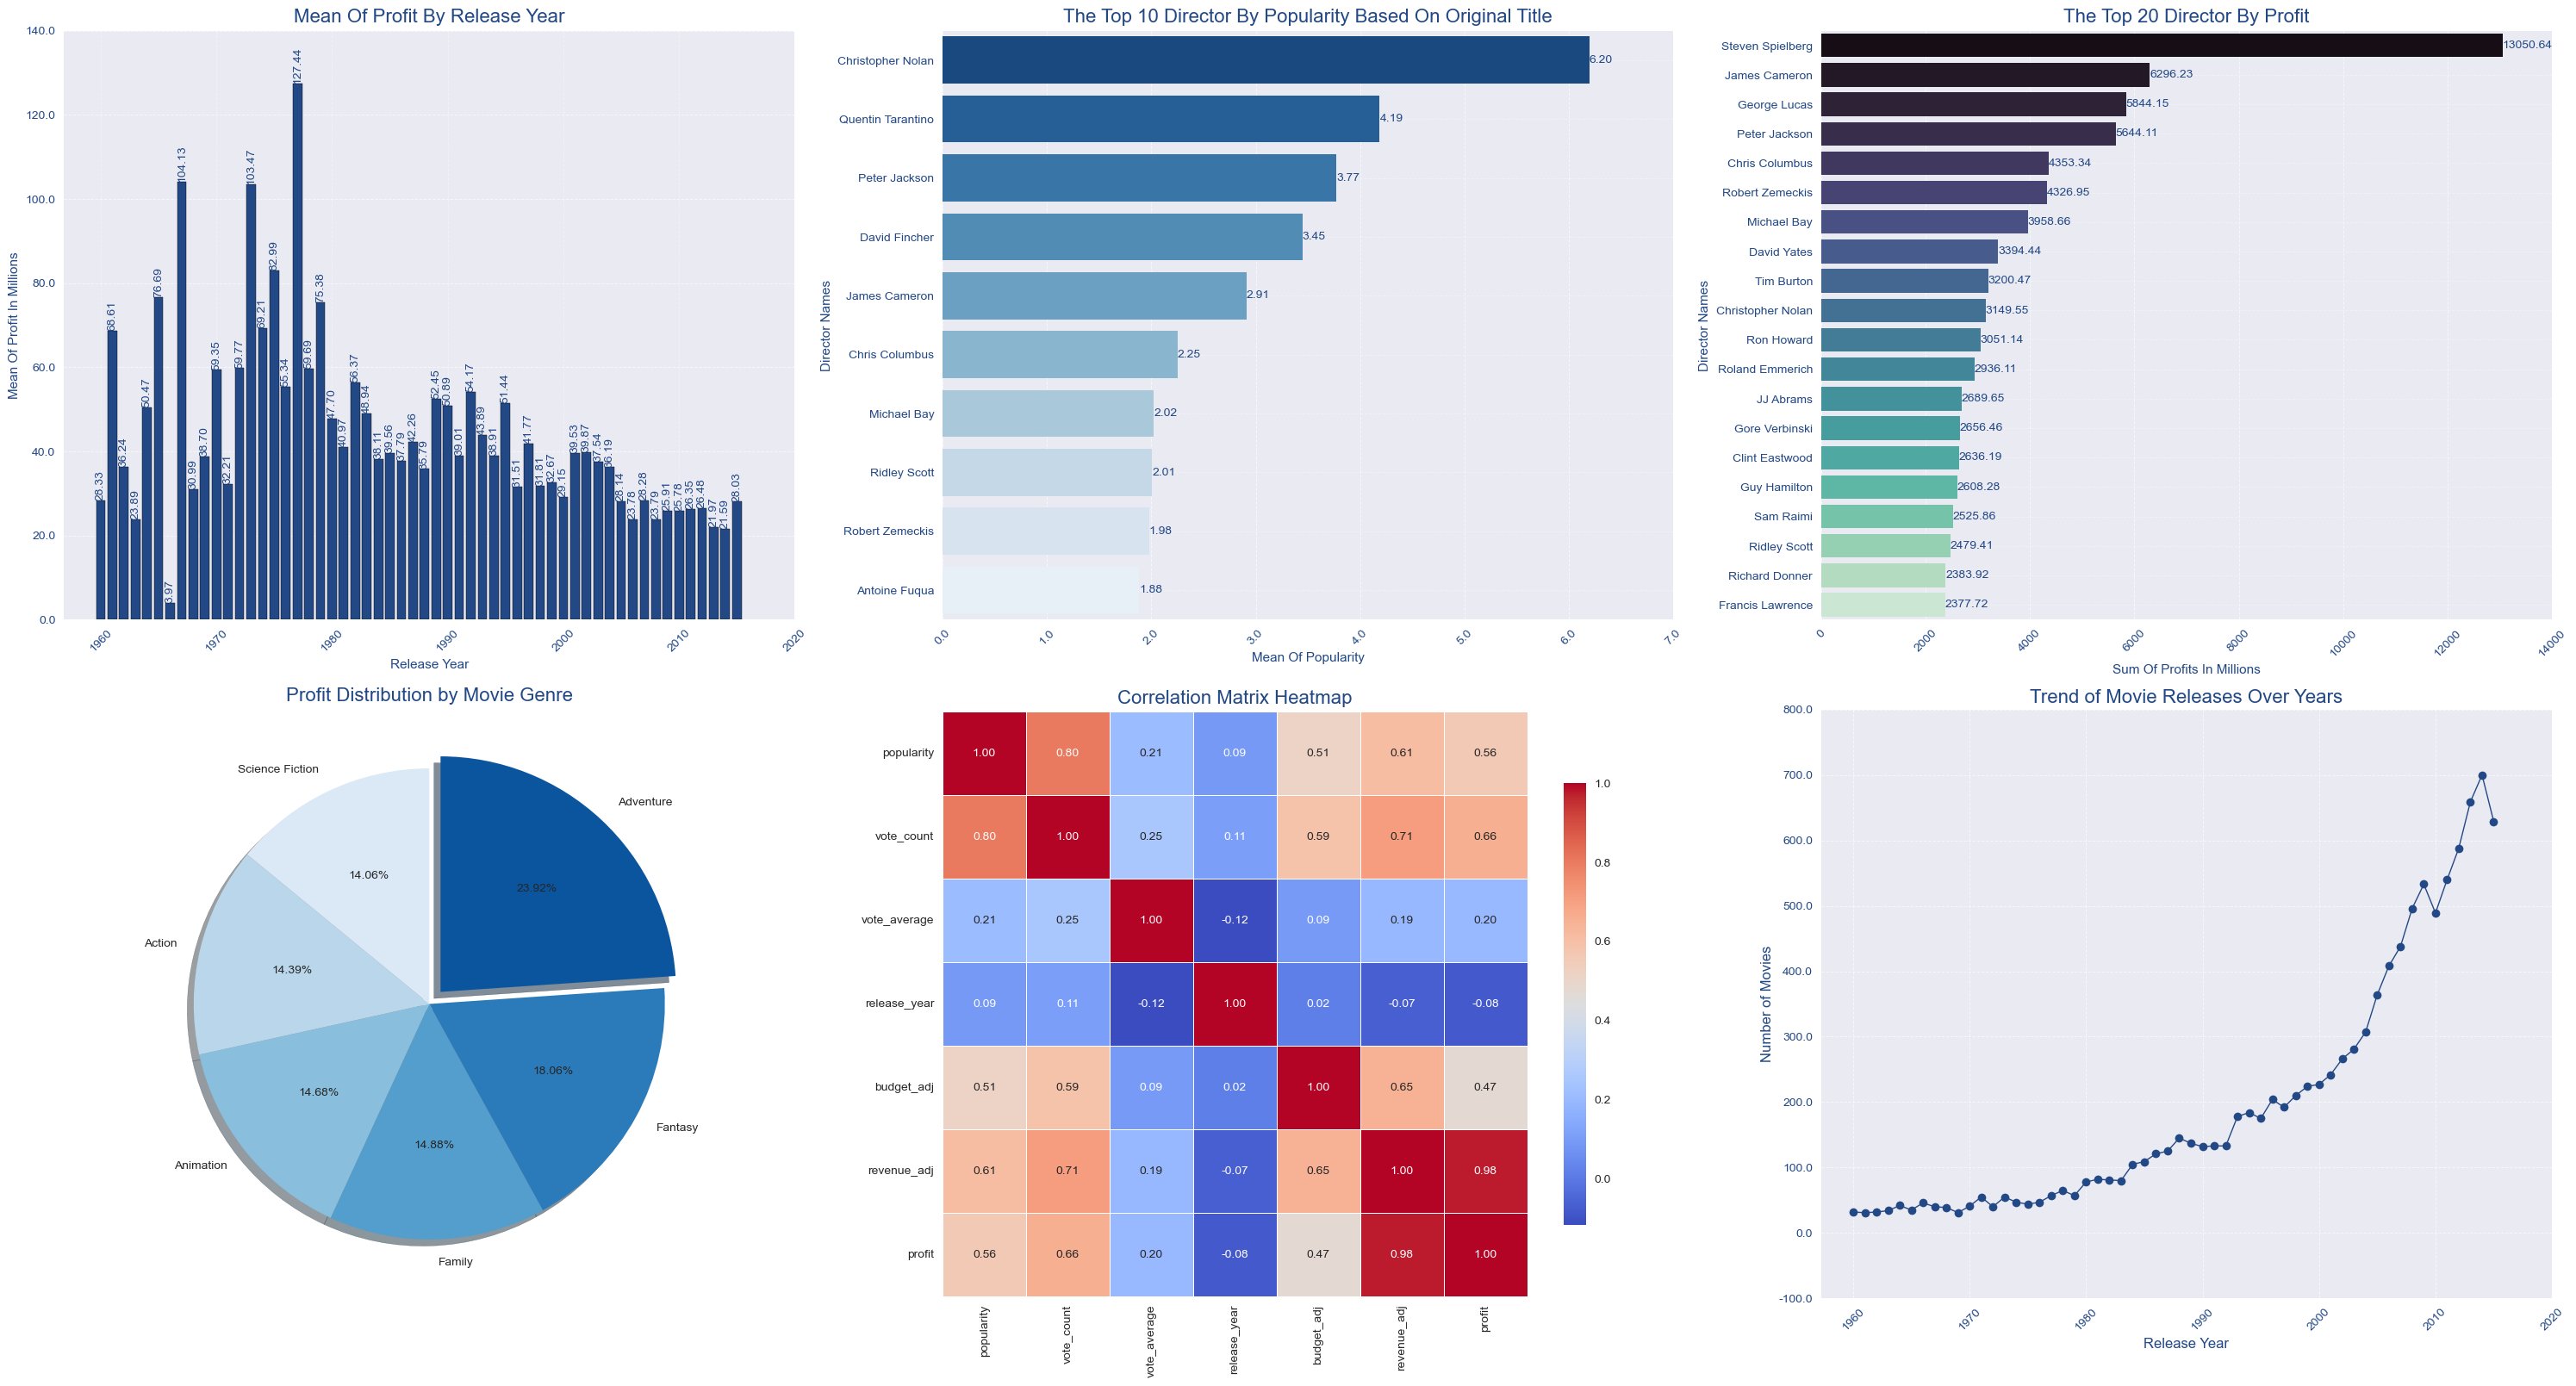

In [48]:
def create_dynamic_fig(nrows, ncols, basewidth=10, baseheight=8):
    width = basewidth * ncols
    height = baseheight * nrows
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height))
    return fig, axs

fig, axs = create_dynamic_fig(nrows=2, ncols=3)

# First plot
axs[0, 0].bar(profitbyrelease_year.index, profitbyrelease_year.values, edgecolor='black', color='#224885', width=0.8)
xticks = list(range(profitbyrelease_year.index.min(), profitbyrelease_year.index.max() + 10, 10))
axs[0, 0].set_xticks(xticks)
axs[0, 0].set_xticklabels([str(year) for year in xticks], rotation=45, ha='center', color='#224885')
axs[0, 0].set_yticks(axs[0, 0].get_yticks())
axs[0, 0].set_yticklabels([f'{y}' for y in axs[0, 0].get_yticks()], color='#224885')
axs[0, 0].set_xlabel('Release Year', color='#224885')
axs[0, 0].set_ylabel('Mean Of Profit In Millions', color='#224885')
axs[0, 0].set_title('Mean Of Profit By Release Year', color='#224885', size=16, pad=7)
axs[0, 0].grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.3)
axs[0, 0].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
for lbl, vl in zip(profitbyrelease_year.index, profitbyrelease_year.values):
    axs[0, 0].text(lbl, vl, f'{vl:.2f}', ha='center', va='bottom', rotation=90, color='#224885')

# Second plot
thetopdirectorbypopularity = thetopdirectorbypopularity.sort_values(ascending=False, by='popularity')
sns.barplot(y=thetopdirectorbypopularity.index, x=thetopdirectorbypopularity['popularity'], palette='Blues_r', ax=axs[0, 1])
axs[0, 1].set_title('The Top 10 Director By Popularity Based On Original Title', color='#224885', size=16, pad=7)
axs[0, 1].set_ylabel('Director Names', color='#224885')
axs[0, 1].set_xlabel('Mean Of Popularity', color='#224885')
axs[0, 1].grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)
axs[0, 1].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.3)
ticks = axs[0, 1].get_xticks()
axs[0, 1].set_xticks(ticks)
axs[0, 1].set_xticklabels([f'{x}' for x in ticks], color='#224885', rotation=45)
axs[0, 1].set_yticklabels([t.get_text() for t in axs[0, 1].get_yticklabels()], rotation=0, color='#224885')
for inx, vl in enumerate(thetopdirectorbypopularity['popularity']):
    axs[0, 1].text(vl, inx, f'{vl:.2f}', ha='left', va='center', rotation=0, color='#224885')

# Third plot 
thetopdirector = thetopdirector.sort_values(ascending=False)
sns.barplot(y=thetopdirector.index, x=thetopdirector.values, palette='mako', ax=axs[0, 2])
axs[0, 2].set_title('The Top 20 Director By Profit', color='#224885', size=16, pad=7)
axs[0, 2].set_ylabel('Director Names', color='#224885')
axs[0, 2].set_xlabel('Sum Of Profits In Millions', color='#224885')
axs[0, 2].grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)
axs[0, 2].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.3)
ticks = axs[0, 2].get_xticks()
axs[0, 2].set_xticks(ticks)
axs[0, 2].set_xticklabels([f'{x:.0f}' for x in ticks], color='#224885', rotation=45)
axs[0, 2].set_yticklabels([t.get_text() for t in axs[0, 2].get_yticklabels()], rotation=0, color='#224885')
for inx, vl in enumerate(thetopdirector):
    axs[0, 2].text(vl, inx, f'{vl:.2f}', ha='left', va='center', rotation=0, color='#224885')

# Fourth plot
positiveprofitbygenre = profitbygenre[profitbygenre.values > 50].sort_values()
explode = [0.07 if genre == 'Adventure' else 0 for genre in positiveprofitbygenre.index]
palette = sns.color_palette("Blues", len(positiveprofitbygenre))
axs[1, 0].pie(x=positiveprofitbygenre.values, labels=positiveprofitbygenre.index, 
              colors=palette, autopct='%1.2f%%', startangle=90, shadow=True, 
              labeldistance=1.1, explode=explode)
axs[1, 0].set_title("Profit Distribution by Movie Genre", fontsize=16, pad=7, color='#224885')

# Fifth plot
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, 
            square=True, cbar_kws={"shrink": .75}, ax=axs[1, 1])
axs[1, 1].set_title('Correlation Matrix Heatmap', fontsize=16, color='#224885', pad=7)

# Sixth plot 
axs[1, 2].plot(moviesovertime.index, moviesovertime['original_title'], color='#224885', marker='o', linestyle='-', linewidth=1)
axs[1, 2].set_title('Trend of Movie Releases Over Years', fontsize=16, color='#224885')
axs[1, 2].set_xlabel('Release Year', fontsize=12, color='#224885')
axs[1, 2].set_ylabel('Number of Movies', fontsize=12, color='#224885')
axs[1, 2].grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
xticks = list(range(moviesovertime.index.min(), moviesovertime.index.max() + 10, 10))
axs[1, 2].set_xticks(xticks)
axs[1, 2].set_xticklabels([str(year) for year in xticks], rotation=45, ha='center', color='#224885')
axs[1, 2].set_yticks(axs[1, 2].get_yticks())
axs[1, 2].set_yticklabels([f'{y}' for y in axs[1, 2].get_yticks()], color='#224885')


fig.subplots_adjust(left=0.036, right=0.982, top=0.970, bottom=0.036, wspace=0.287, hspace=0.202)
plt.tight_layout()
plt.show()

In [49]:
%matplotlib qt

def create_dynamic_fig(nrows, ncols, basewidth=10, baseheight=8):
    width = basewidth * ncols
    height = baseheight * nrows
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height))
    return fig, axs

fig, axs = create_dynamic_fig(nrows=2, ncols=3)

# First plot
axs[0, 0].bar(profitbyrelease_year.index, profitbyrelease_year.values, edgecolor='black', color='#224885', width=0.8)
xticks = list(range(profitbyrelease_year.index.min(), profitbyrelease_year.index.max() + 10, 10))
axs[0, 0].set_xticks(xticks)
axs[0, 0].set_xticklabels([str(year) for year in xticks], rotation=45, ha='center', color='#224885')
axs[0, 0].set_yticks(axs[0, 0].get_yticks())
axs[0, 0].set_yticklabels([f'{y}' for y in axs[0, 0].get_yticks()], color='#224885')
axs[0, 0].set_xlabel('Release Year', color='#224885')
axs[0, 0].set_ylabel('Mean Of Profit In Millions', color='#224885')
axs[0, 0].set_title('Mean Of Profit By Release Year', color='#224885', size=16, pad=7)
axs[0, 0].grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.3)
axs[0, 0].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
for lbl, vl in zip(profitbyrelease_year.index, profitbyrelease_year.values):
    axs[0, 0].text(lbl, vl, f'{vl:.2f}', ha='center', va='bottom', rotation=90, color='#224885')

# Second plot
thetopdirectorbypopularity = thetopdirectorbypopularity.sort_values(ascending=False, by='popularity')
sns.barplot(y=thetopdirectorbypopularity.index, x=thetopdirectorbypopularity['popularity'], palette='Blues_r', ax=axs[0, 1])
axs[0, 1].set_title('The Top 10 Director By Popularity Based On Original Title', color='#224885', size=16, pad=7)
axs[0, 1].set_ylabel('Director Names', color='#224885')
axs[0, 1].set_xlabel('Mean Of Popularity', color='#224885')
axs[0, 1].grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)
axs[0, 1].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.3)
ticks = axs[0, 1].get_xticks()
axs[0, 1].set_xticks(ticks)
axs[0, 1].set_xticklabels([f'{x}' for x in ticks], color='#224885', rotation=45)
axs[0, 1].set_yticklabels([t.get_text() for t in axs[0, 1].get_yticklabels()], rotation=0, color='#224885')
for inx, vl in enumerate(thetopdirectorbypopularity['popularity']):
    axs[0, 1].text(vl, inx, f'{vl:.2f}', ha='left', va='center', rotation=0, color='#224885')

# Third plot 
thetopdirector = thetopdirector.sort_values(ascending=False)
sns.barplot(y=thetopdirector.index, x=thetopdirector.values, palette='mako', ax=axs[0, 2])
axs[0, 2].set_title('The Top 20 Director By Profit', color='#224885', size=16, pad=7)
axs[0, 2].set_ylabel('Director Names', color='#224885')
axs[0, 2].set_xlabel('Sum Of Profits In Millions', color='#224885')
axs[0, 2].grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.6)
axs[0, 2].grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.3)
ticks = axs[0, 2].get_xticks()
axs[0, 2].set_xticks(ticks)
axs[0, 2].set_xticklabels([f'{x:.0f}' for x in ticks], color='#224885', rotation=45)
axs[0, 2].set_yticklabels([t.get_text() for t in axs[0, 2].get_yticklabels()], rotation=0, color='#224885')
for inx, vl in enumerate(thetopdirector):
    axs[0, 2].text(vl, inx, f'{vl:.2f}', ha='left', va='center', rotation=0, color='#224885')

# Fourth plot
positiveprofitbygenre = profitbygenre[profitbygenre.values > 50].sort_values()
explode = [0.07 if genre == 'Adventure' else 0 for genre in positiveprofitbygenre.index]
palette = sns.color_palette("Blues", len(positiveprofitbygenre))
axs[1, 0].pie(x=positiveprofitbygenre.values, labels=positiveprofitbygenre.index, 
              colors=palette, autopct='%1.2f%%', startangle=90, shadow=True, 
              labeldistance=1.1, explode=explode)
axs[1, 0].set_title("Profit Distribution by Movie Genre", fontsize=16, pad=7, color='#224885')

# Fifth plot
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, 
            square=True, cbar_kws={"shrink": .75}, ax=axs[1, 1])
axs[1, 1].set_title('Correlation Matrix Heatmap', fontsize=16, color='#224885', pad=7)

# Sixth plot 
axs[1, 2].plot(moviesovertime.index, moviesovertime['original_title'], color='#224885', marker='o', linestyle='-', linewidth=1)
axs[1, 2].set_title('Trend of Movie Releases Over Years', fontsize=16, color='#224885')
axs[1, 2].set_xlabel('Release Year', fontsize=12, color='#224885')
axs[1, 2].set_ylabel('Number of Movies', fontsize=12, color='#224885')
axs[1, 2].grid(True, linestyle='--', linewidth=0.7, alpha=0.6)
xticks = list(range(moviesovertime.index.min(), moviesovertime.index.max() + 10, 10))
axs[1, 2].set_xticks(xticks)
axs[1, 2].set_xticklabels([str(year) for year in xticks], rotation=45, ha='center', color='#224885')
axs[1, 2].set_yticks(axs[1, 2].get_yticks())
axs[1, 2].set_yticklabels([f'{y}' for y in axs[1, 2].get_yticks()], color='#224885')


fig.subplots_adjust(left=0.036, right=0.982, top=0.970, bottom=0.036, wspace=0.287, hspace=0.202)
plt.tight_layout()
plt.show()

C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

# Thank You !!!